In [23]:
import os

from skimage import io, color, filters, morphology, measure
from PIL import Image

os.makedirs('images/output/todo_skimage', exist_ok=True)


In [24]:
image = io.imread('images/input/kabardinsko-russkii-frazeologicheskii-slovar.pdf-009.jpg')

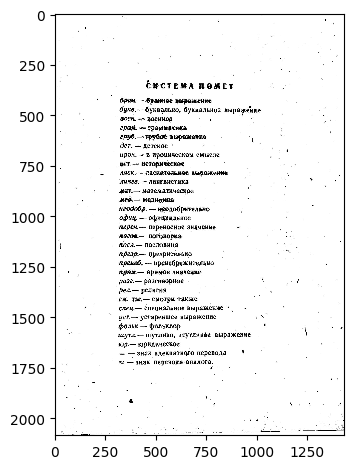

In [25]:
grayscale = color.rgb2gray(image)
io.imshow(grayscale)
Image.fromarray((image * 255).astype('uint8')).save('images/output/todo_skimage/grayscale.jpg')

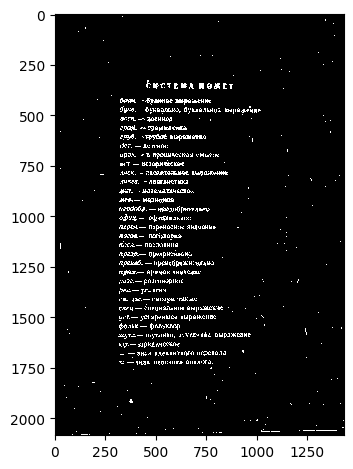

In [26]:
# Бинаризация изображения
threshold = filters.threshold_otsu(grayscale)
binary = grayscale < threshold
io.imshow(binary)
Image.fromarray((binary * 255).astype('uint8')).save('images/output/todo_skimage/binary.jpg')

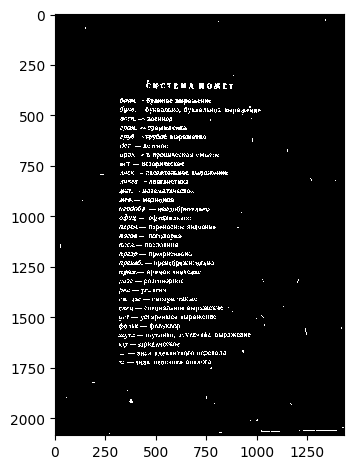

In [27]:
# Удаление мелких объектов (шумов)

import numpy as np

# Нахождение связных компонент (объектов) на бинарном изображении
labels = measure.label(binary)
# Вычисление размеров (площадей) объектов
object_sizes = np.bincount(labels.flat)[1:]
# Вычисление отсечки размера объектов
min_size = np.mean(object_sizes) / 4

cleared = morphology.remove_small_objects(binary, min_size=min_size)

io.imshow(cleared)
Image.fromarray(cleared).save('images/output/todo_skimage/cleared.jpg')